## Title: Milestone1 - Mobile Phone Reviews
## Date: October 09, 2022
## Author: Venkat Jagadeesh Jampani

### Project Milestone 1
1) 250-500-word narrative describing your original idea for the analysis/model building business problem. Clearly identify the problem you will address and the target for your model.
As part of project, I have choosen to analyse and build a model using the reviews on the Iphone models.

For data for this project, sourced from the Kaggle website. Source: https://www.kaggle.com/datasets/grikomsn/amazon-cell-phones-reviews
1. items.csv
2. reviews.csv

I will be evaluating the overall response of cell phone reviews of a previous model of the iPhone from the dataset set. To be specific, this will be about mobile phones of Apple company : iphone X/XE/XS/XR models.

I will be analyzing what features of the phones work well and which ones don't. There are different variables and columns, which make up this project. Some of them include the ASIN number, the review title, review body, the date, the helpful review counter and prices paid. 
My goal is to perform thorough investigation and learn more about the phones. This is a type of practice that saves money, increases customer service satisfaction, and protects brand loyalty for a company. 

I believe that this is important for any company that cares about providing a responsible customer service experience, including Apple. From the graphs, I learned that I can trust the data because there is approximately 140 verified reviews when compared to about 5 unverified reviews. Also, it seems like there are generally positive reviews. 
However, in another graph, I found that the graphs do change from one another. This is helpful because it tells me which areas may need extra attention. 
Finally, I found a number of reviews by the different Item #.

In [1]:
#Load required packages
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import string

In [2]:
#Load dataframes.
items = pd.read_csv('items.csv')
reviews = pd.read_csv('reviews.csv')

In [3]:
#examining the first dataframe : items.csv
items.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


In [6]:
items.tail()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
715,B07ZPKZSSC,Apple,"Apple iPhone 11 Pro, 64GB, Fully Unlocked - Sp...",https://www.amazon.com/Apple-iPhone-64GB-Fully...,https://m.media-amazon.com/images/I/41wDuEW9iZ...,1.0,https://www.amazon.com/product-reviews/B07ZPKZSSC,1,949.00,0.00
716,B07ZQSGP53,Xiaomi,"Xiaomi Redmi Note 8, 32GB/3GB RAM 6.3"" FHD+ Di...",https://www.amazon.com/Xiaomi-Display-Snapdrag...,https://m.media-amazon.com/images/I/41foh4FKHE...,4.6,https://www.amazon.com/product-reviews/B07ZQSGP53,3,150.96,0.00
717,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00
718,B081TJFVCJ,Apple,"Apple iPhone X, 64GB, Gray - Fully Unlocked (R...",https://www.amazon.com/Apple-iPhone-64GB-Gray-...,https://m.media-amazon.com/images/I/71yMgOenT5...,5.0,https://www.amazon.com/product-reviews/B081TJFVCJ,1,478.97,0.00
719,B0825BB7SG,Samsung,Straight Talk Samsung Galaxy A10e Smartphone 5...,https://www.amazon.com/Straight-Samsung-Galaxy...,https://m.media-amazon.com/images/I/81+3SWSAhD...,5.0,https://www.amazon.com/product-reviews/B0825BB7SG,1,139.00,139.26


In [4]:
#examining the second dataframe. reviews.head()
reviews.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [5]:
reviews.tail()

,asin,name,rating,date,verified,title,body,helpfulVotes
67981,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0
67982,B081H6STQQ,2cool4u,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0
67983,B081H6STQQ,simon,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN
67984,B081TJFVCJ,Tobiasz Jedrysiak,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN
67985,B0825BB7SG,Owen Gonzalez,5,"December 11, 2019",False,Outstanding phone for the price,I love the size and style of this phone. It is...,NaN


In [7]:
#finding all Apple : iphone x/xe/xs/xr model entries within the first df : items
AP = items['title'].str.lower().str.find('iphone x')!=-1

In [8]:
#Check how many matches exist i.e how many items of data is there in the items data frame, that has apple x phone reviews.
AP.sum()

11

In [9]:
#creating a new df based on the search i.e create a df that contains only apple i phone X details exluding others model data.
itemsApp_df = items.loc[AP]

In [10]:
# validate the data
itemsApp_df

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
312,B0775451TT,Apple,"Apple iPhone X, 256GB, Silver - For AT&T / T-M...",https://www.amazon.com/Apple-iPhone-Fully-Unlo...,https://m.media-amazon.com/images/I/81yZOQEC+N...,3.9,https://www.amazon.com/product-reviews/B0775451TT,436,479.00,749.99
317,B077578W38,Apple,"Apple iPhone X, Unlocked 5.8"", 64GB - Space Gr...",https://www.amazon.com/Apple-iPhone-Fully-Unlo...,https://m.media-amazon.com/images/I/719knfTwPv...,3.9,https://www.amazon.com/product-reviews/B077578W38,442,448.95,0.00
318,B0775H5HJW,Apple,"Apple iPhone X, GSM Unlocked, 256GB - Silver (...",https://www.amazon.com/Apple-iPhone-GSM-Unlock...,https://m.media-amazon.com/images/I/81yZOQEC+N...,3.8,https://www.amazon.com/product-reviews/B0775H5HJW,139,499.99,735.00
399,B07D6TQP6F,Apple,"Apple iPhone X, 256GB, Silver - For AT&T (Rene...",https://www.amazon.com/Apple-iPhone-AT-256GB-R...,https://m.media-amazon.com/images/I/81yZOQEC+N...,3.9,https://www.amazon.com/product-reviews/B07D6TQP6F,436,476.00,0.00
490,B07KFNRQ5S,Apple,"Apple iPhone Xs Max, 256GB, Space Gray - Fully...",https://www.amazon.com/Apple-iPhone-Max-Fully-...,https://m.media-amazon.com/images/I/71XeQzRDyM...,4.1,https://www.amazon.com/product-reviews/B07KFNRQ5S,230,664.99,0.00
493,B07KKL5KGG,Apple,"Apple iPhone XS, 256GB, Gold - Fully Unlocked ...",https://www.amazon.com/Apple-iPhone-Fully-Unlo...,https://m.media-amazon.com/images/I/41+2tWGDs3...,3.9,https://www.amazon.com/product-reviews/B07KKL5KGG,198,574.99,0.00
542,B07P6Y8L3F,Apple,"Apple iPhone XR, 64GB, Red - Fully Unlocked (R...",https://www.amazon.com/Apple-iPhone-XR-Fully-U...,https://m.media-amazon.com/images/I/61LA-THTwW...,4.4,https://www.amazon.com/product-reviews/B07P6Y8L3F,1,499.99,0.00
598,B07RDMLR4V,Apple,"Apple iPhone XS Max, 256GB, Gray - For AT&T (R...",https://www.amazon.com/Apple-iPhone-Max-256GB-...,https://m.media-amazon.com/images/I/81nSsCFeiT...,4.1,https://www.amazon.com/product-reviews/B07RDMLR4V,230,651.58,0.00
603,B07RKYQSRB,Apple,"Apple iPhone Xs Max, AT&T, 64GB - Gray - (Rene...",https://www.amazon.com/Apple-iPhone-Xs-Max-64G...,https://m.media-amazon.com/images/I/81nSsCFeiT...,4.2,https://www.amazon.com/product-reviews/B07RKYQSRB,13,619.99,0.00
608,B07RT1X4FJ,Apple,"Apple iPhone XS, 256GB, Gray - For AT&T (Renewed)",https://www.amazon.com/Apple-iPhone-XS-256GB-G...,https://m.media-amazon.com/images/I/61xa10dafv...,3.9,https://www.amazon.com/product-reviews/B07RT1X4FJ,198,573.77,0.00


In [11]:
#Seeing the list of different options in the data frame : itemsApp_df
pd.set_option('display.max_colwidth', None)
itemsApp_df['url']

312      https://www.amazon.com/Apple-iPhone-Fully-Unlocked-256GB/dp/B0775451TT
317       https://www.amazon.com/Apple-iPhone-Fully-Unlocked-64GB/dp/B077578W38
318        https://www.amazon.com/Apple-iPhone-GSM-Unlocked-256GB/dp/B0775H5HJW
399      https://www.amazon.com/Apple-iPhone-AT-256GB-Refurbished/dp/B07D6TQP6F
490        https://www.amazon.com/Apple-iPhone-Max-Fully-Unlocked/dp/B07KFNRQ5S
493    https://www.amazon.com/Apple-iPhone-Fully-Unlocked-Renewed/dp/B07KKL5KGG
542         https://www.amazon.com/Apple-iPhone-XR-Fully-Unlocked/dp/B07P6Y8L3F
598            https://www.amazon.com/Apple-iPhone-Max-256GB-Gray/dp/B07RDMLR4V
603               https://www.amazon.com/Apple-iPhone-Xs-Max-64GB/dp/B07RKYQSRB
608             https://www.amazon.com/Apple-iPhone-XS-256GB-Gray/dp/B07RT1X4FJ
718        https://www.amazon.com/Apple-iPhone-64GB-Gray-Unlocked/dp/B081TJFVCJ
Name: url, dtype: object

In [12]:
#merging the two dataframes based on  asin#.( itemsApp_df, reviews) and creating new data frame apple_reviews
apple_reviews = pd.merge(itemsApp_df,reviews, on='asin')
#Dropping nan values.
apple_reviews = apple_reviews.dropna()

In [14]:
#Reviewing the new dataframe
apple_reviews.head()

,asin,brand,title_x,url,image,rating_x,reviewUrl,totalReviews,price,originalPrice,name,rating_y,date,verified,title_y,body,helpfulVotes
0,B0775451TT,Apple,"Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)",https://www.amazon.com/Apple-iPhone-Fully-Unlocked-256GB/dp/B0775451TT,https://m.media-amazon.com/images/I/81yZOQEC+NL._AC_UY218_ML3_.jpg,3.9,https://www.amazon.com/product-reviews/B0775451TT,436,479.0,749.99,Max,1,"November 7, 2018",True,Cracked and does not turn on.,The screen was cracked and the phone did not turn in after 24 hours of charging.,124.0
1,B0775451TT,Apple,"Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)",https://www.amazon.com/Apple-iPhone-Fully-Unlocked-256GB/dp/B0775451TT,https://m.media-amazon.com/images/I/81yZOQEC+NL._AC_UY218_ML3_.jpg,3.9,https://www.amazon.com/product-reviews/B0775451TT,436,479.0,749.99,Hung D Le,1,"November 26, 2018",True,Not a Refurbished Iphone,"It is not a Refurbished iphone, it is activated",120.0
2,B0775451TT,Apple,"Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)",https://www.amazon.com/Apple-iPhone-Fully-Unlocked-256GB/dp/B0775451TT,https://m.media-amazon.com/images/I/81yZOQEC+NL._AC_UY218_ML3_.jpg,3.9,https://www.amazon.com/product-reviews/B0775451TT,436,479.0,749.99,Javier Martínez Hernández,1,"April 20, 2019",True,Possibility to change the phone?,I bought this phone and this is my first picture with the back camera and also when Im tapping look like multitouch. There is any possibility to change the phone?,101.0
3,B0775451TT,Apple,"Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)",https://www.amazon.com/Apple-iPhone-Fully-Unlocked-256GB/dp/B0775451TT,https://m.media-amazon.com/images/I/81yZOQEC+NL._AC_UY218_ML3_.jpg,3.9,https://www.amazon.com/product-reviews/B0775451TT,436,479.0,749.99,Raif Bucar,1,"January 8, 2019",True,Don't buy from this seller.,"This product is falsely labeled as unlocked, it's been 4 weeks since I informed that the phone was still locked and all I get are excuses. Plus, the phone came in a really bad condition, so many scratches you can see them very clearly.",95.0
4,B0775451TT,Apple,"Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)",https://www.amazon.com/Apple-iPhone-Fully-Unlocked-256GB/dp/B0775451TT,https://m.media-amazon.com/images/I/81yZOQEC+NL._AC_UY218_ML3_.jpg,3.9,https://www.amazon.com/product-reviews/B0775451TT,436,479.0,749.99,Dorothy W.,1,"April 16, 2019",True,THIS PHONE WAS NOT PAYED OFF,"I purchased a refurbished iPhone x, it arrived on time, came in clean , and with a charger.... i was excited about this phone because my other phone was stolen 3 months ago, i got a job and saved up to be able to afford a new one. We tried to set up the service with total wireless and the phone kept repeating the message that the sim card was not compatible.... so we bought another sim card and service plan by t mobile and got the same thing.... went into apple the next day to try to see if their was anything wrong with the phone... turns out their was nothing wrong with the phone, but the phone already had another service plan with at&t that wasn't even payed off.... so after wasting 10 hours off my time, and spending $60 (besides the $690 phone price) trying to set this stupid phone up with a service plan... i would review this 0 stars if i could",71.0


In [15]:
#Dropping erroneous/unwanted columns.
del apple_reviews['image']
del apple_reviews['url']
del apple_reviews['reviewUrl']
del apple_reviews['price']
del apple_reviews['name']
del apple_reviews['rating_x']

In [16]:
#Renaming columns as elow
apple_reviews.columns = ['Item #', 'Brand', 'Model', 'Reviews', 'Price', 'Rating', 'Date', 'Verified', 'Review Title', 'Review',
                 'Helpful']
apple_reviews['Date'] = pd.to_datetime(apple_reviews['Date']) #Reformatting date/time format.
apple_reviews.sample(n=5)

,Item #,Brand,Model,Reviews,Price,Rating,Date,Verified,Review Title,Review,Helpful
43,B0775451TT,Apple,"Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)",436,749.99,1,2019-05-02,True,Worked for one day and then it died,I would not buy a renewed or refurbished phone. I am sending this back with the 90 day guarantee.,4.0
1533,B07RDMLR4V,Apple,"Apple iPhone XS Max, 256GB, Gray - For AT&T (Renewed)",230,0.00,2,2019-12-03,True,Lots of problems with the refurbished item,"I found the phone having various glitches throughout its use. For one, the camera is lower quality than the same phone that my friends had and had purchased new. It would often get very hot. Lots of apps would crash and it would run slowly. Often the front camera would not be as receptive and it would crash. The camera would often remain black and wouldn't work until I reset the whole phone. Lots of problems in general. Don't recommend...",1.0
1490,B07P6Y8L3F,Apple,"Apple iPhone XR, 64GB, Red - Fully Unlocked (Renewed)",1,0.00,5,2019-05-21,True,Good phone,I don’t know why everyone’s giving this seller a bad review. Excellent phone and fast shipping 5 stars for me . I will be back to buy more soon.,111.0
1707,B07RT1X4FJ,Apple,"Apple iPhone XS, 256GB, Gray - For AT&T (Renewed)",198,0.00,4,2019-09-19,True,Good phone,It is good refurbisded phone. I like it.,1.0
911,B07D6TQP6F,Apple,"Apple iPhone X, 256GB, Silver - For AT&T (Renewed)",436,0.00,5,2019-08-25,True,Recommend,Great iPhone service quick thanks highly recommend,1.0


In [17]:
#Infomation about the numerical columns.
apple_reviews.describe()

,Reviews,Price,Rating,Helpful
count,724.000000,724.000000,724.000000,724.000000
mean,325.430939,189.818425,3.294199,13.440608
std,126.432995,325.421083,1.816756,34.158698
min,1.000000,0.000000,1.000000,1.000000
25%,198.000000,0.000000,1.000000,1.000000
50%,436.000000,0.000000,4.000000,3.000000
75%,436.000000,735.000000,5.000000,8.000000
max,442.000000,749.990000,5.000000,436.000000


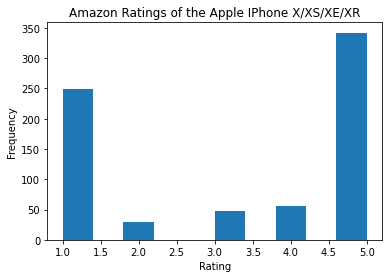

In [18]:
#Graph 1: Histogram for ratings
plt.hist(apple_reviews['Rating'])
plt.title("Amazon Ratings of the Apple IPhone X/XS/XE/XR")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

<AxesSubplot:title={'center':'Amazon Verified Count'}, xlabel='Verified', ylabel='count'>

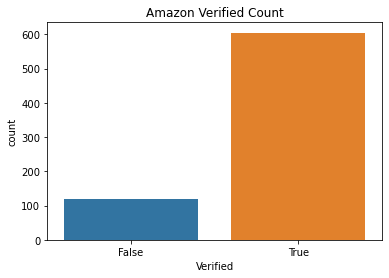

In [19]:
#Graph 2: Histogram for ratings
plt.title('Amazon Verified Count')
sns.countplot(x="Verified", data=apple_reviews)

<AxesSubplot:title={'center':'Amazon Phone Review by Count'}, xlabel='Item #', ylabel='count'>

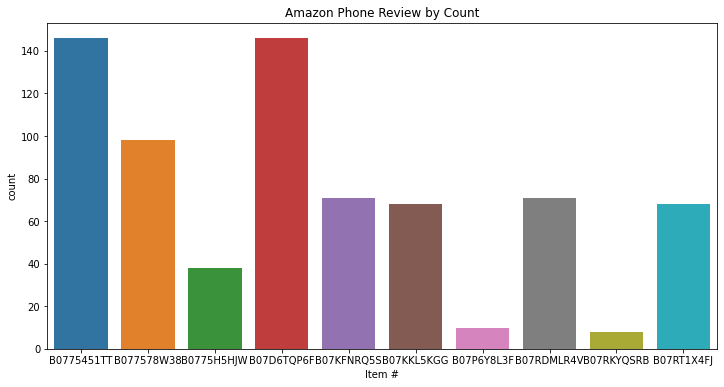

In [20]:
#Graph 3: Item # Count Plot
plt.figure(figsize=(12, 6)) #adjusting the size so it's easily seen.
plt.title('Amazon Phone Review by Count')
sns.countplot(x="Item #", data=apple_reviews)

<AxesSubplot:title={'center':'Amazon Phone Ratings by Count'}, xlabel='Item #', ylabel='Rating'>

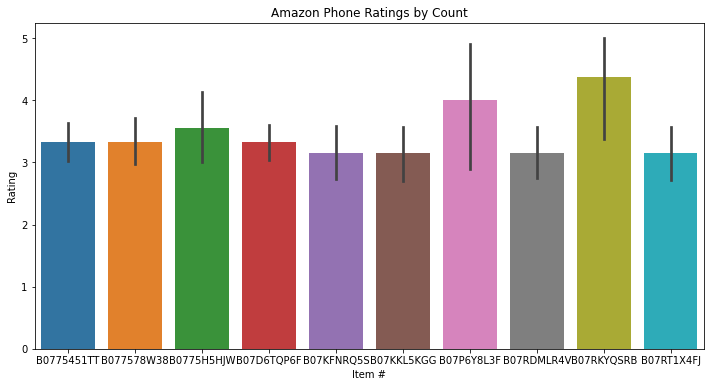

In [21]:
#Graph 4: Item # Count Plot
plt.figure(figsize=(12, 6)) #adjusting the size so it's easily seen.
plt.title('Amazon Phone Ratings by Count')
sns.barplot(x="Item #",y='Rating', data=apple_reviews)

Conclusion: 
Based on the Above data and graphs, I understand that there are lot of outliners in the price,reviews,also have NaaN,null and missing values in other features, in order to train the model, but most of the features have hightest missing values, we should first clean up the data and filter the data to get the insights. Description column has the useful information for our model, we should write regular expression on description column to filter the useful info like adding or modifying the column names.

I am planning to use Random Forest model to analyze the Iphone reviews.